In [4]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr

In [5]:
from tensorflow.keras.layers import LSTM,Dense,RNN
from tensorflow.keras import Sequential
from tensorflow import keras
from keras.layers.core import Dense, Activation, Dropout
import tensorflow as tf
from MLF.bt import Preparacion_datos
import numpy as np
from stock_data import data
import altair as alt
import plotly.express as px


2022-08-04 20:40:02.785688: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-08-04 20:40:02.844183: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-04 20:40:02.844210: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [6]:
data('XPEV').yahoo_data('1m')['timestamp']


[1657289280,
 1657289340,
 1657289400,
 1657289460,
 1657289520,
 1657289580,
 1657289640,
 1657289700,
 1657289760,
 1657289820,
 1657289880,
 1657289940,
 1657290000,
 1657290060,
 1657290120,
 1657290180,
 1657290240,
 1657290300,
 1657290360,
 1657290420,
 1657290480,
 1657290540,
 1657290600,
 1657290660,
 1657290720,
 1657290780,
 1657290840,
 1657290900,
 1657290960,
 1657291020,
 1657291080,
 1657291140,
 1657291200,
 1657291260,
 1657291320,
 1657291380,
 1657291440,
 1657291500,
 1657291560,
 1657291620,
 1657291680,
 1657291740,
 1657291800,
 1657291860,
 1657291920,
 1657291980,
 1657292040,
 1657292100,
 1657292160,
 1657292220,
 1657292280,
 1657292340,
 1657292400,
 1657292460,
 1657292520,
 1657292580,
 1657292640,
 1657292700,
 1657292760,
 1657292820,
 1657292880,
 1657292940,
 1657293000,
 1657293060,
 1657293120,
 1657293180,
 1657293240,
 1657293300,
 1657293360,
 1657293420,
 1657293480,
 1657293540,
 1657293600,
 1657293660,
 1657293720,
 1657293780,
 1657293840,

In [7]:



stock=yf.Ticker('AAPL').history(period='1d',interval='1m')
x_low=stock['Low'].values.reshape(-1,1)
x_higth=stock['High'].values.reshape(-1,1)
Volumen=stock['Volume'].values.reshape(-1,1)
num=1
hy=[]
hx=[]
puntos_x=[]
puntos_y=[]
Volume_l=[]
Volume_h=[]
for i in range(x_low.size-1):
    
    if x_low[i]<x_low[i-num]and x_low[i]<x_low[i+num]:
          par=[x_low[i-num],x_low[i],x_low[i+num]]
          pary=i
       
          puntos_x.append(par)
          puntos_y.append(pary)

for i in range(x_higth.size-1): 
   
         if x_higth[i]>x_higth[i-num] and x_higth[i]>x_higth[i+num]:
             ptr_h=[x_higth[i-num],x_higth[i],x_higth[i+num]]
             ptr_y=i
             hx.append(ptr_h)
             hy.append(ptr_y)


for i in puntos_y: 
   
      Volume_l.append(Volumen[i].tolist())
for i in hy: 
   
      Volume_h.append(Volumen[i].tolist())


x_vol_l=np.arange(len(Volume_l))

x_vol_h=np.arange(len(Volume_h))

low_=np.array(puntos_x).reshape(-1,3)
higth=np.array(hx).reshape(-1,3)

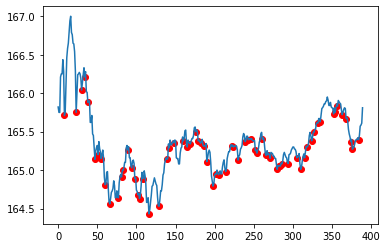

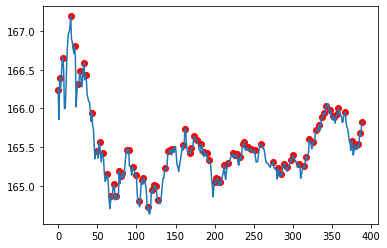

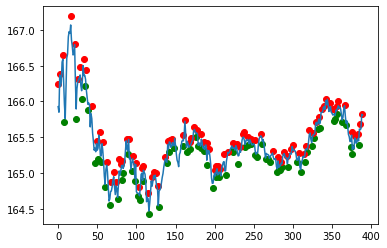

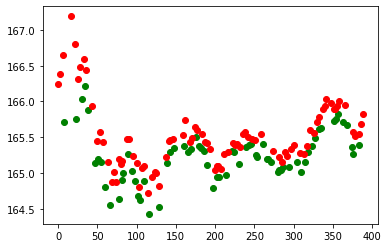

In [8]:



plt.scatter(puntos_y,low_[:,1],color='red')
plt.plot(np.arange(x_low.size),x_low)
plt.show()
plt.scatter(hy,higth[:,1],color='red')
plt.plot(np.arange(x_higth.size),x_higth)
plt.show()
plt.plot(np.arange(stock['Low'].size),stock['Close'].values)
plt.scatter(puntos_y,low_[:,1],color='green')
plt.scatter(hy,higth[:,1],color='red')
plt.show()
plt.scatter(puntos_y,low_[:,1],color='green')
plt.scatter(hy,higth[:,1],color='red')

In [9]:
cambios=len(hx)+len(puntos_x)
tiempo=400/60
cambios_hora=cambios/tiempo
cambios_hora

23.849999999999998

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [11]:

y=np.append(higth[:,1],low_[:,1]).reshape(-1,1)
x=np.append(hx,puntos_x).reshape(-1,3)

pros=MinMaxScaler()
_x=pros.fit_transform(x)
_y=pros.fit_transform(y)

x_train=_x[:100].reshape(-1,3,1)

y_train=_y[:100].reshape(-1,1,1)

x_test=_x[100:130].reshape(-1,3,1)

y_test=_y[100:130].reshape(-1,1,1)


x_p=_x[130:].reshape(-1,3,1)

In [12]:
x

array([[165.80999756, 166.24000549, 165.86000061],
       [165.86000061, 166.38999939, 166.25      ],
       [166.59899902, 166.65499878, 166.5       ],
       [167.03100586, 167.19000244, 166.8999939 ],
       [166.71000671, 166.80000305, 166.66000366],
       [166.22000122, 166.31500244, 166.30619812],
       [166.38999939, 166.47929382, 166.3999939 ],
       [166.5       , 166.58999634, 166.36999512],
       [166.36999512, 166.4367981 , 166.36999512],
       [165.83500671, 165.94000244, 165.77999878],
       [165.44000244, 165.44999695, 165.36000061],
       [165.55000305, 165.56869507, 165.41999817],
       [165.41999817, 165.42999268, 165.34500122],
       [165.12989807, 165.1499939 , 165.03999329],
       [164.80000305, 164.86999512, 164.83990479],
       [164.97000122, 165.02000427, 164.94999695],
       [164.81990051, 164.86999512, 164.83999634],
       [164.86999512, 165.19000244, 165.02999878],
       [165.02999878, 165.125     , 165.1000061 ],
       [165.1000061 , 165.16999

In [30]:
model=Sequential()
model.add(tf.keras.layers.Input(shape=(3,1)))
model.add(Dense(10))
model.add(Dense(8))
model.add(Dense(6))
model.add(LSTM(1))

model.compile(optimizer="Adam", loss="mse",metrics=[tf.keras.metrics.BinaryAccuracy()])
model.fit(x_train,y_train,batch_size=10,epochs=25,use_multiprocessing=True)

Epoch 1/25
10/10 [==============================] - 1s 2ms/step - loss: 0.5636 - binary_accuracy: 0.0100
Epoch 2/25
10/10 [==============================] - 0s 6ms/step - loss: 0.3929 - binary_accuracy: 0.0100
Epoch 3/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2768 - binary_accuracy: 0.0100
Epoch 4/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2020 - binary_accuracy: 0.0100
Epoch 5/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1529 - binary_accuracy: 0.0100
Epoch 6/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1146 - binary_accuracy: 0.0100
Epoch 7/25
10/10 [==============================] - 0s 3ms/step - loss: 0.0846 - binary_accuracy: 0.0200
Epoch 8/25
10/10 [==============================] - 0s 3ms/step - loss: 0.0640 - binary_accuracy: 0.0200
Epoch 9/25
10/10 [==============================] - 0s 3ms/step - loss: 0.0493 - binary_accuracy: 0.0200
Epoch 10/25
10/10 [==============================] - 0s

In [31]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 487ms/step - loss: 0.0051 - binary_accuracy: 0.0000e+00


[0.005132302176207304, 0.0]

In [32]:
predict=model.predict(x_p)
predict.shape

1/1 [==============================] - 0s 335ms/step


(25, 1)

In [33]:
x_pred=pros.inverse_transform(predict.reshape(-1,1))

In [34]:
x[130:],x_pred

(array([[166.13000488, 166.07000732, 166.125     ],
        [166.19000244, 166.05999756, 166.13000488],
        [166.30499268, 166.25999451, 166.28010559],
        [166.24000549, 166.23500061, 166.24000549],
        [166.18649292, 166.17500305, 166.24009705],
        [166.22000122, 166.21000671, 166.27999878],
        [166.27999878, 166.22000122, 166.30499268],
        [166.19999695, 166.1000061 , 166.11999512],
        [166.11999512, 166.00999451, 166.13000488],
        [166.1000061 , 166.08000183, 166.16119385],
        [166.1499939 , 166.02999878, 166.04499817],
        [166.24000549, 166.19999695, 166.27999878],
        [166.06500244, 166.03999329, 166.1000061 ],
        [166.05149841, 165.94999695, 166.00990295],
        [165.90499878, 165.86999512, 165.96000671],
        [166.04499817, 165.94000244, 165.96000671],
        [166.05999756, 166.05000305, 166.07000732],
        [165.92880249, 165.80999756, 165.86999512],
        [166.02000427, 165.91000366, 165.99499512],
        [166

In [13]:

x[130:],x_pred

x_rp=np.append(y[100:130],x_pred)
print('predict')
plt.plot(np.arange(x_rp.size),x_rp)
plt.show()
print('real plot')
plt.plot(np.arange(y[100:].size),y[100:])
plt.show()
plt.plot(np.arange(y[100:].size),y[100:])
plt.plot(np.arange(x_rp.size),x_rp,color='green')

NameError: name 'x_pred' is not defined

In [29]:



open_data=stock.Open

data_close=stock.Close

Volume=stock.Volume.values

precio_anterior=open_data-open_data.shift(1)

x_data=list()


desviacion_=[open_data[:i].values.std() for i in range(open_data.shape[0])]



/home/leonelbenitez/Projects/HFT---Binance/.venv/lib64/python3.10/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/leonelbenitez/Projects/HFT---Binance/.venv/lib64/python3.10/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/leonelbenitez/Projects/HFT---Binance/.venv/lib64/python3.10/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [30]:
y=data_close.values.reshape(-1,1)
trans_data=MinMaxScaler()
for i in range(open_data.shape[0]):
 
 xe=[open_data.values.tolist()[i],desviacion_[i],y[i]]
 x_data.append(xe)
 
x_=np.array(x_data).reshape(-1,1)
x_trans=trans_data.fit_transform(x_)
x=x_trans.reshape(-1,3,1)

y_=np.array(y).reshape(-1,1)
y_trans=trans_data.fit_transform(y_)
y=y_trans


y.shape,x.shape

/tmp/ipykernel_12474/1725283029.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_=np.array(x_data).reshape(-1,1)


((390, 1), (390, 3, 1))

In [31]:
x

array([[[9.93634941e-01],
        [           nan],
        [9.93171063e-01]],

       [[9.92168414e-01],
        [0.00000000e+00],
        [9.92707185e-01]],

       [[9.92588635e-01],
        [7.33263647e-04],
        [9.95819616e-01]],

       ...,

       [[9.91270614e-01],
        [2.69567725e-03],
        [9.91330437e-01]],

       [[9.91390351e-01],
        [2.69289193e-03],
        [9.92527625e-01]],

       [[9.92467711e-01],
        [2.69025829e-03],
        [9.92467711e-01]]])

In [32]:
train_sample=250
test_sample=320

x_train=x[2:train_sample]
x_test=x[train_sample:test_sample]
x_pred=x[test_sample:]

y_train=y[2:train_sample]
y_test=y[train_sample:test_sample]
y_pred=y[test_sample:]




In [33]:
model=Sequential()
model.add(tf.keras.layers.Input(shape=(x.shape[1],1)))
model.add(Dense(10))
model.add(Dense(8))
model.add(Dense(6))
model.add(Dense(4,'relu'))
model.add(LSTM(1,'tanh'))
model.compile(optimizer="Adam", loss="mse")
model.fit(x_train,y_train,batch_size=10,epochs=100,use_multiprocessing=True)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.0415
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0403
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0404
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0408
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0403
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0411
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0402
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0406
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0403
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0404
Epoch 11/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0404
Epoch 12/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0406
Epoch 13/100
25/25 [=================

In [34]:
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.0050


0.005000591743737459

3/3 [==============================] - 0s 2ms/step
precision: 0.0
70 70


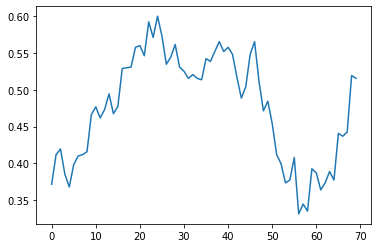

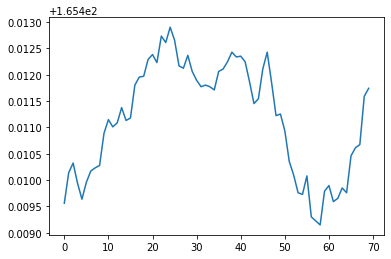

In [35]:
predict=model.predict(x_pred)

prediccion=trans_data.inverse_transform(predict)
d=prediccion.shape[0] is x_pred.shape[0]
metrics=keras.metrics.BinaryAccuracy()
metrics.update_state(y[test_sample:],prediccion)
l=metrics.result().numpy()

print("precision:",l)
print(y[test_sample:].size,prediccion.size)

plt.plot(y[test_sample:])
plt.show()
plt.plot(prediccion)
